<a href="https://colab.research.google.com/github/Tommy975/ML_Intro/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest-Neighbors

En fait, le k-NN est un type spécial d’algorithme qui n’utilise pas de modèle statistique. Il est "non paramétrique" et il se base uniquement sur les données d’entraînement. Ce type d’algorithme est appelé memory-based. A contrario, la régression linéaire est paramétrique, de paramètre θ et ne va donc pas avoir besoin de conserver toutes les données pour effectuer des prédictions, mais seulement θ.


> k n'est pas un paramètre mais un __hyperparamètre__, c'est-à-dire que contrairement aux paramètres classiques, il ne va pas pouvoir être appris automatiquement par l'algorithme à partir des données d'entraînement. Les hyperparamètres permettent de caractériser le modèle (complexité, rapidité de convergence, etc). Ce ne sont pas les données d'apprentissage qui vont permettre de trouver ces paramètres (en l'occurrence ici, le nombre de voisins **k**), mais bien à nous de l'optimiser à l'aide du jeu de données test.

#Utilisation de k-NN sur le dataset Mnist

### Les données et la problématique

> *" D'abord, parlons du jeu de données que nous allons utiliser. C'est un dataset très célèbre, appelé MNIST. Il est constitué d'un ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9). L'objectif de ce jeu de données était de permettre à un ordinateur d'apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple). Ce dataset utilise des données réelles qui ont déjà été pré-traitées pour être plus facilement utilisables par un algorithme."*

Pour charger ce jeu de données:
```
# This is formatted as code
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
```



In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


# Échantillonage


In [6]:
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

#Séparation training/testing set

In [7]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

#Le k-NN

In [15]:
from sklearn import neighbors

knn =neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [16]:
error = 1- knn.score(xtest, ytest)
print("Erreur = %f" % error)

Erreur = 0.075000


# Optimisation

On test l'algo pour des valeurs de k allant de 2 a 15 afin de mesurer l'erreur et de déterminer la performance en focntion de k:



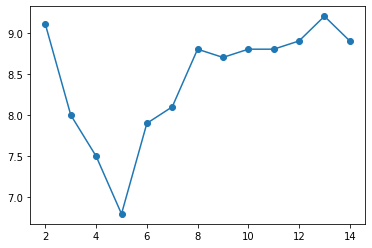

In [21]:
errors = []

for k in range(2,15):
  knn = neighbors.KNeighborsClassifier(k)
  errors.append(100 * ( 1 - knn.fit(xtrain,ytrain).score(xtest,ytest)))

plt.plot(range(2,15), errors, 'o-')
plt.show()

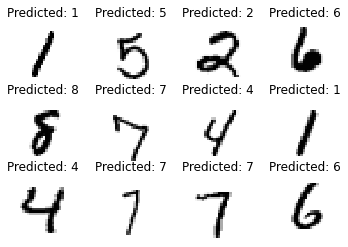

In [22]:
  # On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(5)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

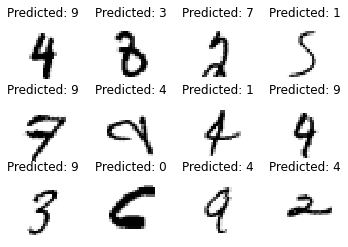

In [25]:
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# ON sélectionne un echantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

for index, value in enumerate(select):
  plt.subplot(3,4,index+1)
  plt.axis('off')
  plt.imshow(misclass_images[value], cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Predicted: {}'.format(misclass_predicted[value]))

plt.show()